In [23]:
%matplotlib inline
import pandas as pd

In [24]:
titles = pd.read_csv('../dataset/titles.csv')

# faster to calculates such 30s or 50s .)

titles['decades'] = titles['year'] // 10 * 10


titles.head()

,title,year,decades
0,Chatur Singh Two Star,2011,2010
1,Night Train for Inverness,1960,1960
2,Njiur melambai,1951,1950
3,Roya-ye nime-shab-e tabestan,1994,1990
4,Undskyld jeg forstyrrer,2012,2010


In [25]:
cast = pd.read_csv('../dataset/cast.csv')

cast['decades'] = cast['year'] // 10 * 10

cast.head()

,title,year,name,type,character,n,decades
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,2010
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0,1980
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0,2010
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN,2010
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN,2010


In [48]:
k = cast

g = k.groupby(['decades', 'type']).size()


# how can we compare them
g_unstack = g.unstack()

g_unstack

# more interesting way :)

type,actor,actress
decades,,
1890,2,1
1900,54,16
1910,27605,15830
1920,48726,24075
1930,151290,49972
1940,162364,51795
1950,157738,57733
1960,134605,57744
1970,152811,66974


In [32]:
uyy = g.unstack(0)

uyy

decades,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2110
type,,,,,,,,,,,,,,,
actor,2,54,27605,48726,151290,162364,157738,134605,152811,197530,263000,489468,747346,140,2
actress,1,16,15830,24075,49972,51795,57733,57744,66974,91509,125040,263941,448737,127,1


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [30]:
m = k[(k.character == 'Superman') | (k.character == 'Batman')]

gm = m.groupby(['year', 'character']).size()

gm.unstack(0).fillna(0)


year,1938,1940,1943,1948,1949,1950,1951,1953,1954,1955,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
character,,,,,,,,,,,,,,,,,,,,,
Batman,1.0,1.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,...,3.0,3.0,4.0,2.0,5.0,5.0,4.0,12.0,9.0,4.0
Superman,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,5.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,5.0,2.0


In [40]:
z = gm.unstack().fillna(0)

# z['Superman'] - z['Batman']
sss = z.Superman - z.Batman

len(sss[sss > 0])

11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [41]:
len(sss[sss < 0])

27

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

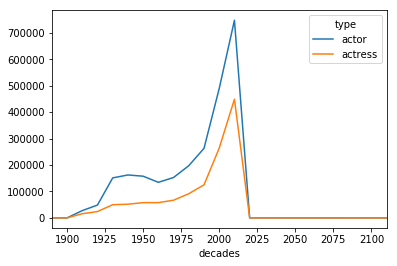

In [44]:
g.unstack().plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

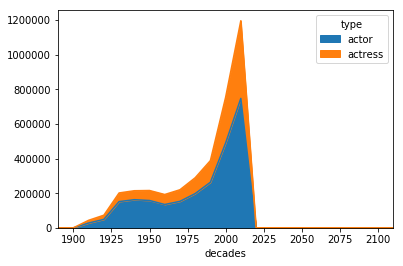

In [45]:
g.unstack().plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

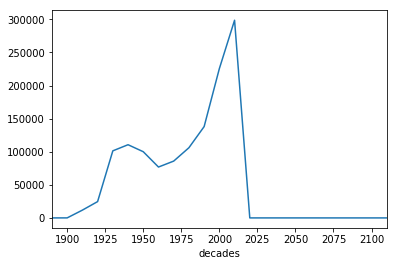

In [51]:
diff = g_unstack.actor - g_unstack.actress

diff.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

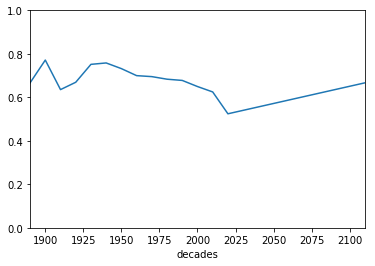

In [54]:
fraction = g_unstack.actor / ( g_unstack.actor + g_unstack.actress)

fraction.plot(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.